In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

In [4]:
df = pd.read_csv("C:\\Users\\iremk\\Desktop\\veri analiz\\DATA\\friends_episodes.csv", encoding='ISO-8859-1')

In [16]:
df.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [17]:
df.describe()

,Year_of_prod,Season,Episode Number,Duration,Stars,Votes
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,1998.961864,5.377119,12.377119,22.338983,8.458898,3369.605932
std,2.843924,2.814428,6.936010,1.514303,0.396320,864.431311
min,1994.000000,1.000000,1.000000,22.000000,7.200000,2557.000000
25%,1997.000000,3.000000,6.000000,22.000000,8.200000,2886.750000
50%,1999.000000,5.000000,12.000000,22.000000,8.400000,3148.500000
75%,2001.000000,8.000000,18.000000,22.000000,8.700000,3583.500000
max,2004.000000,10.000000,25.000000,30.000000,9.700000,10381.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_of_prod    236 non-null    int64  
 1   Season          236 non-null    int64  
 2   Episode Number  236 non-null    int64  
 3   Episode_Title   236 non-null    object 
 4   Duration        236 non-null    int64  
 5   Summary         236 non-null    object 
 6   Director        236 non-null    object 
 7   Stars           236 non-null    float64
 8   Votes           236 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.7+ KB


In [28]:
season_counts= df['Season'].value_counts().sort_index()

In [27]:
season_counts
#Episode number in every season

Season
1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: count, dtype: int64

In [66]:
duration_count = df.groupby("Duration").agg({"Duration": "count"}).rename(columns={"Duration": "Episode_Count"})
stars_mean = df.groupby("Duration").agg({"Stars": "mean"}).rename(columns={"Stars": "Average_Stars"})
votes_mean = df.groupby("Duration").agg({"Votes": "mean"}).rename(columns={"Votes": "Average_Votes"})
df1 = duration_count.merge(stars_mean, on='Duration').merge(votes_mean, on='Duration')
df1
#Average stars and votes according to durations of episodes

,Episode_Count,Average_Stars,Average_Votes
Duration,,,
22,222,8.442793,3340.481982
23,1,8.600000,2792.000000
24,3,8.166667,2666.666667
26,1,8.500000,2713.000000
27,1,8.200000,2588.000000
30,8,9.025000,4693.375000


In [39]:
directors = df.groupby("Director").agg(
    Episode_Count=("Episode_Title", "count"),
    Average_Stars=("Stars", "mean"),
 ).sort_values("Average_Stars",ascending=False)
filtered_directors = directors.query("Episode_Count >= 10")
filtered_directors
#Highest rated directors who directed more than 10 episodes

,Episode_Count,Average_Stars
Director,,
Kevin Bright,54,8.646296
David Schwimmer,10,8.540000
Michael Lembeck,24,8.520833
James Burrows,15,8.500000
Gary Halvorson,54,8.401852
Gail Mancuso,14,8.357143
Peter Bonerz,12,8.325000
Ben Weiss,10,8.300000


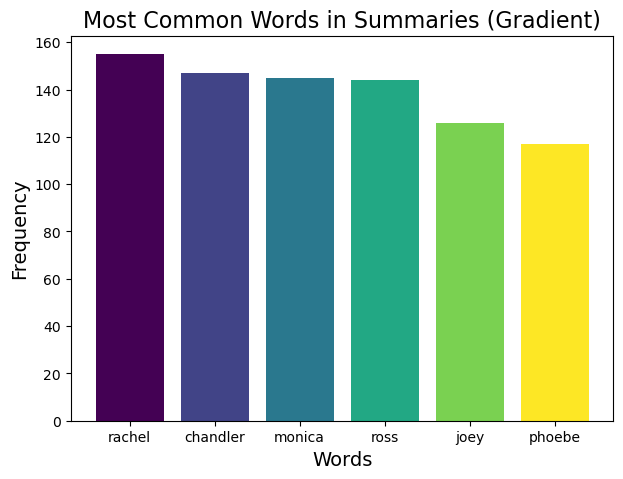

In [51]:
import re
from collections import Counter

stopwords = ['the', 'and', 'is', 'in', 'of', 'to', 'a', 'for', 'on', 'with']
all_summaries = ' '.join(df['Summary'].dropna())
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_summaries).lower()
words = cleaned_text.split()
filtered_words = [word for word in words if word not in stopwords]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(6)
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

plt.figure(figsize=(7,5))
bars = plt.bar(words, counts, color=colors)

plt.title('Most Common Words in Summaries (Gradient)', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()
#Actors names that mentioned most to least

In [67]:
Most_Rated_Episodes = df[['Season', 'Episode_Title', 'Stars']].sort_values(by='Stars', ascending=False)
Most_Rated_Episodes
#5 Most and least rated episodes

,Season,Episode_Title,Stars
235,10,The Last One: Part 2,9.7
110,5,The One Where Everybody Finds Out,9.7
234,10,The Last One: Part 1,9.5
84,4,The One with the Embryos,9.5
37,2,The One with the Prom Video,9.4
...,...,...,...
188,8,The One with Joey's Interview,7.5
203,9,The One with Christmas in Tulsa,7.5
166,7,The One with the Vows,7.5
140,6,The One with Mac and C.H.E.E.S.E.,7.4
